# Pre-Lecture HW

## Question 1

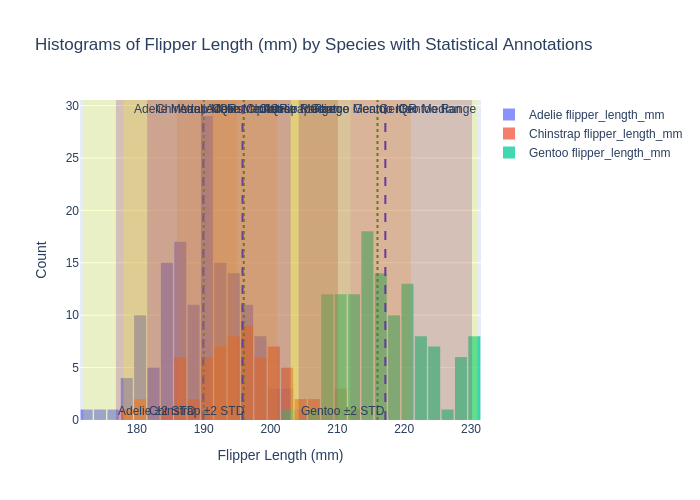

In [58]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the penguins dataset
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv'
df = pd.read_csv(url)

# Drop missing values in flipper_length_mm
df = df.dropna(subset=['flipper_length_mm'])

# Create histograms for each species
species_list = df['species'].unique()
fig = go.Figure()

for species in species_list:
    species_data = df[df['species'] == species]
    
    # Add histogram trace
    fig.add_trace(go.Histogram(
        x=species_data['flipper_length_mm'], 
        name=f'{species} flipper_length_mm', 
        opacity=0.75,
        nbinsx=20
    ))

    # Calculate location and scale statistics
    mean = species_data['flipper_length_mm'].mean()
    median = species_data['flipper_length_mm'].median()
    std = species_data['flipper_length_mm'].std()
    min_val = species_data['flipper_length_mm'].min()
    max_val = species_data['flipper_length_mm'].max()
    q1 = species_data['flipper_length_mm'].quantile(0.25)
    q3 = species_data['flipper_length_mm'].quantile(0.75)

    # Add vertical lines for mean and median
    fig.add_vline(x=mean, line=dict(color='blue', dash='dash'), annotation_text=f'{species} Mean', annotation_position="top left")
    fig.add_vline(x=median, line=dict(color='green', dash='dot'), annotation_text=f'{species} Median', annotation_position="top right")

    # Add shaded rectangle for full range (min to max)
    fig.add_vrect(x0=min_val, x1=max_val, fillcolor="yellow", opacity=0.2, line_width=0, annotation_text=f'{species} Range', annotation_position="top right")

    # Add shaded rectangle for interquartile range (Q1 to Q3)
    fig.add_vrect(x0=q1, x1=q3, fillcolor="orange", opacity=0.2, line_width=0, annotation_text=f'{species} IQR', annotation_position="top left")

    # Add shaded rectangle for two standard deviations around the mean
    fig.add_vrect(x0=mean-2*std, x1=mean+2*std, fillcolor="purple", opacity=0.2, line_width=0, annotation_text=f'{species} ±2 STD', annotation_position="bottom left")

# Update layout
fig.update_layout(
    title="Histograms of Flipper Length (mm) by Species with Statistical Annotations",
    xaxis_title="Flipper Length (mm)",
    yaxis_title="Count",
    barmode='overlay',
    bargap=0.1
)

fig.show(renderer="png")


**[Link to the ChatBot Session](https://chatgpt.com/share/66f1a428-3c14-800e-aeec-85de796e96a1)**

**Summary to the ChatBot Session:**

Summary of Interactions:
Request for Guidance on Plotly Annotations: You asked for assistance in using Plotly to annotate histograms of flipper_length_mm for each species in the penguins dataset, specifically using fig.add_vline() and fig.add_vrect() to mark:

Location statistics: Mean and median.
Scale statistics: Full range, interquartile range, and two standard deviations away from the mean.
Implementation of Code: I provided you with the code that:

Loads the penguins dataset from a URL.
Creates a histogram for each species' flipper_length_mm.
Annotates the histogram with vertical lines representing the mean and median.
Adds shaded regions for:
The full range (minimum to maximum).
The interquartile range (25th to 75th percentile).
The range of two standard deviations away from the mean.
The resulting plot includes appropriate color coding and transparency for ease of interpretation.
Details of Code Explanation:

I explained how each Plotly function works:
go.Histogram() for creating the histograms.
add_vline() for adding vertical lines to show the mean and median.
add_vrect() for creating shaded regions representing the statistical ranges.
The figure was designed to overlay multiple species on the same plot, with annotations for each species clearly labeled.

## Question 2

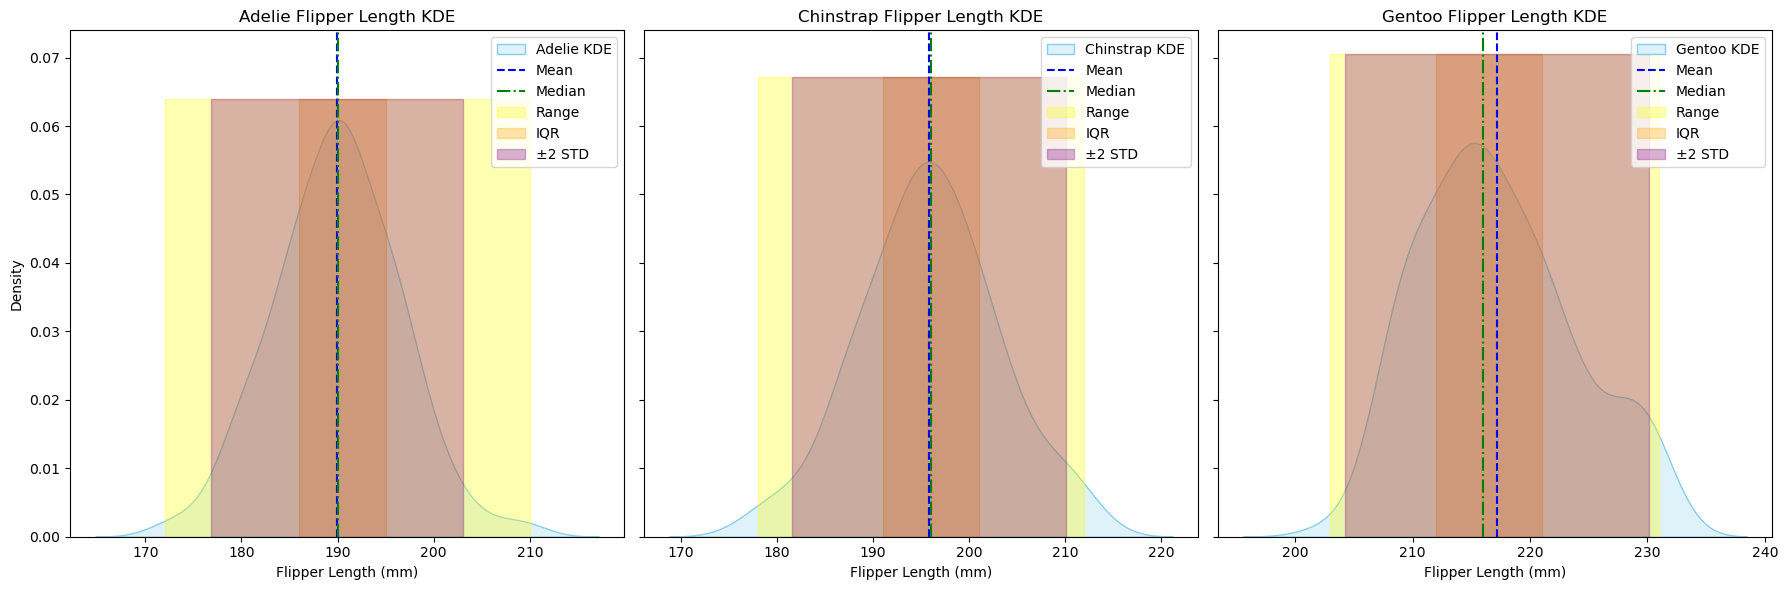

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the penguins dataset
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv'
df = pd.read_csv(url)

# Drop missing values in flipper_length_mm
df = df.dropna(subset=['flipper_length_mm'])

# Set up the figure with one row and three subplots
species_list = df['species'].unique()
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for i, species in enumerate(species_list):
    species_data = df[df['species'] == species]['flipper_length_mm']
    
    # Calculate statistics
    mean = species_data.mean()
    median = species_data.median()
    std = species_data.std()
    min_val = species_data.min()
    max_val = species_data.max()
    q1 = species_data.quantile(0.25)
    q3 = species_data.quantile(0.75)

    # Create KDE plot
    sns.kdeplot(species_data, ax=axes[i], fill=True, color="skyblue", label=f'{species} KDE')

    # Add vertical lines for mean and median
    axes[i].axvline(mean, color='blue', linestyle='--', label='Mean')
    axes[i].axvline(median, color='green', linestyle='-.', label='Median')

    # Add shaded areas for full range, IQR, and ±2 standard deviations
    y_vals = np.linspace(0, axes[i].get_ylim()[1], 100)
    
    # Full range (min to max)
    axes[i].fill_betweenx(y_vals, min_val, max_val, color='yellow', alpha=0.3, label='Range')
    
    # Interquartile range (Q1 to Q3)
    axes[i].fill_betweenx(y_vals, q1, q3, color='orange', alpha=0.3, label='IQR')

    # ±2 standard deviations from the mean
    axes[i].fill_betweenx(y_vals, mean-2*std, mean+2*std, color='purple', alpha=0.3, label='±2 STD')

    # Set plot titles and labels
    axes[i].set_title(f'{species} Flipper Length KDE')
    axes[i].set_xlabel('Flipper Length (mm)')
    axes[i].legend()

# Adjust layout
plt.tight_layout()
plt.show()

**[Link to the ChatBot Session](https://chatgpt.com/share/66f1a428-3c14-800e-aeec-85de796e96a1)**

**Summary of the ChatBot Session**

Summary of Interactions:
Request for KDE Plot Implementation: You asked for guidance on transitioning the previous problem, which used Plotly for visualizing the flipper_length_mm of penguins, to Seaborn KDE plots, with the goal of annotating each species' plot with statistical measures:

Location statistics: Mean and median.
Scale statistics: Full range, interquartile range, and two standard deviations away from the mean.
Provided Code Implementation: I provided Python code that:

Loads the penguins dataset and filters flipper_length_mm data for each species.
Uses Seaborn’s kdeplot() to generate Kernel Density Estimation (KDE) plots for flipper_length_mm by species.
Annotates the KDE plots with vertical lines for the mean and median using axvline().
Adds shaded areas using fill_betweenx() for:
The full range (minimum to maximum values).
The interquartile range (25th to 75th percentile).
A range of two standard deviations around the mean.
Organizes the plots into a row of three figures, one for each species, using Matplotlib’s subplots().
Explanation of the Code:

Seaborn's kdeplot() is used to generate a KDE plot with filled areas representing the density of flipper_length_mm.
Matplotlib’s axvline() adds vertical lines at the calculated mean and median for each species.
fill_betweenx() is used to highlight the ranges of the full dataset, interquartile range (IQR), and the standard deviations.
The three KDE plots are arranged side-by-side, ensuring a consistent y-axis scale across the plots for easy comparison.

## Question 3

**The contrasting descriptions**

- I think the contrasting descriptions of the three "data distribution" visualization methods (box plot, histogram, and kernel density estimation) are the different ways they represent data distributions. Box Plot does not provide much details on the shape of the data distrubution, but it can focus on certain key summary statistics, the median and the quartiles, as well as the outliers. Histogram gives relatively detailed views on the distribution's frequency, but is constrained by bin sizes. KDE gives a smooth view of the distribution. 
- **ChatBot agrees with it** by replying that: 
    - Box Plot: It provides a concise summary by focusing on key statistics like the median, quartiles, and potential outliers. However, it doesn’t reveal much about the overall shape of the distribution, such as whether the data is skewed or multimodal.

    - Histogram: This method shows the distribution of data by grouping it into bins. While it offers more insight into the frequency and shape of the distribution, the appearance can vary depending on how bins are chosen, which might oversimplify or overcomplicate the view.

    - Kernel Density Estimation (KDE): It provides a smoothed estimate of the data's probability density, giving a clearer picture of the overall shape and structure. However, it doesn’t show actual data points or count frequencies, and the smoothness can depend on the bandwidth chosen.

**The pros and cons list that ChatBot came up with**

1. Box Plot
    - Pros:

Concise Summary: Effectively summarizes key statistics (median, quartiles, and outliers).
Identifies Outliers: Clearly highlights outliers in the data.
Comparison: Useful for comparing distributions across multiple groups.

    - Cons:

Limited Detail: Does not show the overall shape of the distribution.
Ignores Frequency: Does not provide information about the frequency of data points within the quartiles.
Can Be Misleading: Might misrepresent data distributions if the sample size is small.

2. Histogram
    - Pros:

Visualizes Frequency: Clearly shows how data is distributed across different ranges (bins).
Detailed Shape: Provides insights into the shape (e.g., skewness, modality) of the distribution.
Intuitive: Easy to understand for a general audience.

    - Cons:

Bin Sensitivity: The appearance can change significantly based on bin width and placement, potentially obscuring true data patterns.
Loss of Data Granularity: Data points within the same bin are aggregated, which can hide individual variations.
Limited Comparisons: Difficult to compare multiple distributions directly unless they are overlaid or in a faceted layout.

3. Kernel Density Estimation (KDE)
    - Pros:

Smooth Representation: Provides a smooth curve that represents the underlying distribution, making it easier to see the overall shape.
Flexible: Can handle different types of data and doesn’t depend on binning, reducing arbitrary choices.
Captures Structure: Can reveal multimodal distributions effectively.

    - Cons:

Bandwidth Sensitivity: The choice of bandwidth can significantly affect the resulting density estimate; poor choices can either oversmooth or undersmooth.
No Actual Counts: Does not show actual data counts or frequencies, which can make interpretations less intuitive.
Can Mislead: If misused, can exaggerate or underplay features of the data distribution.

**My Preference**

I think my preference amongst the three visualization methods depends on what details from the data am i looking for. For a clear summary of key statistical features, such as the median, quartiles, and potential outliers, I prefer using box plot. For getting a view on the frequency of the distribution of the data, I prefer using histogram. For a continuous and smooth view of the data distribution, KDE does the job. 

**More details on the Preference explanation**

I prefer box plots for visualizing data distribution because they provide a clear summary of key statistical features, such as the median, quartiles, and potential outliers. Here’s my rationale:

Conciseness: Box plots summarize data with just a few statistics, making it easy to compare distributions across multiple groups at a glance.

Outlier Detection: They effectively highlight outliers, allowing for quick identification of extreme values that might warrant further investigation.

Comparison Across Groups: Box plots facilitate easy comparison between different categories or groups, which is valuable when analyzing multiple datasets side by side.

Histograms and KDE (Kernel Density Estimates) are also useful, but they can be more sensitive to bin size (in the case of histograms) or bandwidth (for KDE), which may lead to misinterpretations if not chosen carefully. 

**Links to the Online Images of box plot, histogram, and kernel density estimator**
- [Images of box plot, histogram, and KDE](https://citoolkit.com/articles/histograms-and-boxplots/)
- [Images of histogram and KDE](https://www.astroml.org/book_figures/chapter6/fig_hist_to_kernel.html)
- [Images with a focus on box plot](https://labplot.kde.org/2021/08/11/box-plot/)

**[Link to the ChatBot Session](https://chatgpt.com/share/66f4bfac-7e34-800e-b648-97adbf98bb15)**

**Summary of the ChatBot Session**
Discussion Topic: Data Distribution Visualization Methods

Initial Insights:

The user provided contrasting descriptions of three data distribution visualization methods: box plots, histograms, and kernel density estimation (KDE).
They noted that:
Box Plots summarize key statistics (median, quartiles, outliers) but lack detail on distribution shape.
Histograms offer detailed views on frequency but are constrained by bin sizes.
KDE provides a smooth view of the distribution, allowing for insights into its overall shape.
Pros and Cons Analysis:

The user requested a list of pros and cons for each visualization method.
Box Plot:
Pros: Concise summary, identifies outliers, useful for comparisons.
Cons: Limited detail, ignores frequency, can be misleading with small sample sizes.
Histogram:
Pros: Visualizes frequency, detailed shape, intuitive.
Cons: Sensitive to bin choice, loses data granularity, limited comparison capability.
KDE:
Pros: Smooth representation, flexible, captures structure.
Cons: Sensitive to bandwidth choice, does not show actual counts, potential for misleading representations.
User Preferences:

The user expressed their preferences for the visualization methods based on the details sought from the data:
Box plots for key statistical features.
Histograms for frequency distribution views.
KDE for a continuous and smooth view of data distribution.

## Question 4

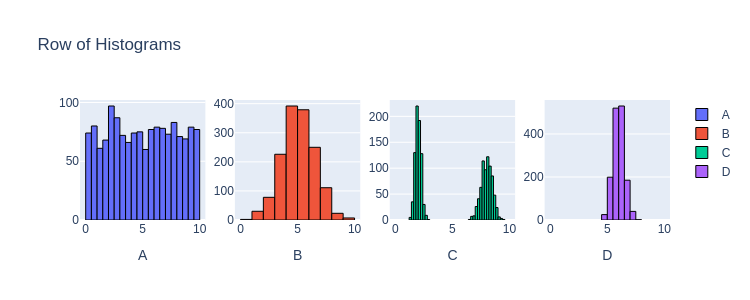

In [57]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
# stats.norm.rvs(mean, variance)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

### 4.1: Which datasets have similar means and similar variances

The datasets A and B have similar means and similar variances.

- A:
mean: 5.07
variance: 8.36

- C: 
mean: 4.99
variance: 9.17

we let 'similar means' and 'similar variances' stand for 'they differ by less than 1.0'.

Datasets 1, 2, 3, 4 refer to Datasets A, B, C, D respectively below

In [4]:
# Calculate means and variances
means = [np.mean(data1), np.mean(data2), np.mean(data3), np.mean(data4)]
variances = [np.var(data1), np.var(data2), np.var(data3), np.var(data4)]

# Print results
for i, (mean, var) in enumerate(zip(means, variances), start=1):
    print(f"Dataset {i}: Mean = {mean:.2f}, Variance = {var:.2f}")


Dataset 1: Mean = 5.07, Variance = 8.36
Dataset 2: Mean = 4.99, Variance = 2.34
Dataset 3: Mean = 4.99, Variance = 9.17
Dataset 4: Mean = 6.01, Variance = 0.24


In [6]:
# Define thresholds for similarity
mean_threshold = 1.0
variance_threshold = 1.0

# Compare means and variances
similar_datasets = []

for i in range(len(means)):
    for j in range(i + 1, len(means)):
        mean_diff = abs(means[i] - means[j])
        var_diff = abs(variances[i] - variances[j])
        
        if mean_diff < mean_threshold and var_diff < variance_threshold:
            similar_datasets.append((i + 1, j + 1))  # Store 1-based index

# Print similar datasets
if similar_datasets:
    for pair in similar_datasets:
        print(f"Datasets {pair[0]} and {pair[1]} have similar means and variances.")
else:
    print("No datasets have similar means and variances.")


Datasets 1 and 3 have similar means and variances.


In [8]:
from scipy import stats
import numpy as np

# Data generation
n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

# Calculate means and variances
means = [np.mean(data1), np.mean(data2), np.mean(data3), np.mean(data4)]
variances = [np.var(data1), np.var(data2), np.var(data3), np.var(data4)]

# Define thresholds for similarity
mean_threshold = 0.5
variance_threshold = 0.5

# Compare means and variances
similar_datasets = []

for i in range(len(means)):
    for j in range(i + 1, len(means)):
        mean_diff = abs(means[i] - means[j])
        var_diff = abs(variances[i] - variances[j])
        
        if mean_diff < mean_threshold and var_diff < variance_threshold:
            similar_datasets.append((i + 1, j + 1))  # Store 1-based index

# Print similar datasets
if similar_datasets:
    for pair in similar_datasets:
        print(f"Datasets {pair[0]} and {pair[1]} have similar means and variances.")
else:
    print("No datasets have similar means and variances.")

# Print means and variances for reference
for i, (mean, var) in enumerate(zip(means, variances), start=1):
    print(f"Dataset {i}: Mean = {mean:.2f}, Variance = {var:.2f}")


No datasets have similar means and variances.
Dataset 1: Mean = 5.03, Variance = 8.31
Dataset 2: Mean = 4.99, Variance = 2.07
Dataset 3: Mean = 5.00, Variance = 9.12
Dataset 4: Mean = 6.01, Variance = 0.24


### 4.2: Which datasets have similar means but quite different variances


The datasets A and B have similar means but quite different variances, and the datasets B and C also have similar means but quite different variances.

- A:
mean: 4.89
variance: 8.24

- B:
mean: 4.97
variance: 2.19

- C:
mean: 5.00
variance: 9.05

we let 'similar means' stands for 'they differ by less than 1.0', and 'quite different variances' stands for 'they differ by greater than 2.0'.

Datasets 1, 2, 3, 4 refer to Datasets A, B, C, D respectively below

In [9]:
from scipy import stats
import numpy as np

# Data generation
n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

# Calculate means and variances
means = [np.mean(data1), np.mean(data2), np.mean(data3), np.mean(data4)]
variances = [np.var(data1), np.var(data2), np.var(data3), np.var(data4)]

# Define thresholds for similarity in means and dissimilarity in variances
mean_threshold = 1.0  # Small threshold for similarity
variance_threshold = 2.0  # Larger threshold for dissimilarity

# Compare means and variances
similar_means_different_variances = []

for i in range(len(means)):
    for j in range(i + 1, len(means)):
        mean_diff = abs(means[i] - means[j])
        var_diff = abs(variances[i] - variances[j])
        
        if mean_diff < mean_threshold and var_diff > variance_threshold:
            similar_means_different_variances.append((i + 1, j + 1))  # Store 1-based index

# Print results
if similar_means_different_variances:
    for pair in similar_means_different_variances:
        print(f"Datasets {pair[0]} and {pair[1]} have similar means but quite different variances.")
else:
    print("No datasets have similar means but quite different variances.")

# Print means and variances for reference
for i, (mean, var) in enumerate(zip(means, variances), start=1):
    print(f"Dataset {i}: Mean = {mean:.2f}, Variance = {var:.2f}")


Datasets 1 and 2 have similar means but quite different variances.
Datasets 2 and 3 have similar means but quite different variances.
Dataset 1: Mean = 4.89, Variance = 8.24
Dataset 2: Mean = 4.97, Variance = 2.19
Dataset 3: Mean = 5.00, Variance = 9.05
Dataset 4: Mean = 6.00, Variance = 0.25


### 4.3: Which datasets have similar variances but quite different means

The datasets B and D have similar variances but quite different means. 

- B: 
mean: 4.95
variance: 2.29

- D:
mean: 6.00
variance: 0.25

we let 'similar variances' stands for 'they differ by less than 3.0' and 'quite different means' stands for 'they differ by greater than 1.0'. 

Datasets 1, 2, 3, 4 refer to Datasets A, B, C, D respectively below

In [20]:
from scipy import stats
import numpy as np

# Data generation
n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

# Calculate means and variances
means = [np.mean(data1), np.mean(data2), np.mean(data3), np.mean(data4)]
variances = [np.var(data1), np.var(data2), np.var(data3), np.var(data4)]

# Define thresholds for dissimilarity in means and similarity in variances
mean_threshold = 1.0  # Larger threshold for dissimilarity
variance_threshold = 3.0  # Smaller threshold for similarity

# Compare means and variances
different_means_similar_variances = []

for i in range(len(means)):
    for j in range(i + 1, len(means)):
        mean_diff = abs(means[i] - means[j])
        var_diff = abs(variances[i] - variances[j])
        
        if mean_diff > mean_threshold and var_diff < variance_threshold:
            different_means_similar_variances.append((i + 1, j + 1))  # Store 1-based index

# Print results
if different_means_similar_variances:
    for pair in different_means_similar_variances:
        print(f"Datasets {pair[0]} and {pair[1]} have quite different means but similar variances.")
else:
    print("No datasets have quite different means but similar variances.")

# Print means and variances for reference
for i, (mean, var) in enumerate(zip(means, variances), start=1):
    print(f"Dataset {i}: Mean = {mean:.2f}, Variance = {var:.2f}")


Datasets 2 and 4 have quite different means but similar variances.
Dataset 1: Mean = 5.11, Variance = 8.14
Dataset 2: Mean = 4.95, Variance = 2.29
Dataset 3: Mean = 5.00, Variance = 9.28
Dataset 4: Mean = 6.00, Variance = 0.25


### 4.4: Which datasets have quite different means and quite different variances

The datasets A and D have quite different means and quite different variances, as well as datasets C and D also have quite different means and quite different variances. 

- A:
mean: 5.00
variance: 8.14

- C:
mean: 5.01
variance: 9.13

- D:
mean: 6.02
variance: 0.24

we let 'quite different means' means 'they differ by larger than 0.5', and 'quite different variances' means 'they differ by larger than 2.0'. 

Datasets 1, 2, 3, 4 refer to Datasets A, B, C, D respectively below

In [30]:
from scipy import stats
import numpy as np

# Data generation
n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

# Calculate means and variances
means = [np.mean(data1), np.mean(data2), np.mean(data3), np.mean(data4)]
variances = [np.var(data1), np.var(data2), np.var(data3), np.var(data4)]

# Define thresholds for dissimilarity in means and variances
mean_threshold = 0.5  # Larger threshold for quite different means
variance_threshold = 2.0  # Larger threshold for quite different variances

# Compare means and variances
different_means_and_variances = []

for i in range(len(means)):
    for j in range(i + 1, len(means)):
        mean_diff = abs(means[i] - means[j])
        var_diff = abs(variances[i] - variances[j])
        
        if mean_diff > mean_threshold and var_diff > variance_threshold:
            different_means_and_variances.append((i + 1, j + 1))  # Store 1-based index

# Print results
if different_means_and_variances:
    for pair in different_means_and_variances:
        print(f"Datasets {pair[0]} and {pair[1]} have quite different means and quite different variances.")
else:
    print("No datasets have quite different means and quite different variances.")

# Print means and variances for reference
for i, (mean, var) in enumerate(zip(means, variances), start=1):
    print(f"Dataset {i}: Mean = {mean:.2f}, Variance = {var:.2f}")


Datasets 1 and 4 have quite different means and quite different variances.
Datasets 3 and 4 have quite different means and quite different variances.
Dataset 1: Mean = 5.00, Variance = 8.14
Dataset 2: Mean = 5.01, Variance = 2.24
Dataset 3: Mean = 5.01, Variance = 9.13
Dataset 4: Mean = 6.02, Variance = 0.24


**Links to the ChatBot Sessions:**
- https://chatgpt.com/share/66f1b790-c928-800e-aad7-f3611aae04fa 
- https://chatgpt.com/share/66f1b784-e928-800e-9c88-ab90c42d466e

**Summaries to the ChatBot Sessions**

Summary of Exchanges
Histogram Creation:

You provided a Python code snippet that generates histograms for four different datasets using scipy and plotly. We discussed the code's structure and functionality, including data generation and visualization techniques.
Identifying Similar Means and Variances:

You asked how to check which datasets have similar means and variances. I provided a code example to calculate means and variances for the datasets, along with criteria for determining similarity based on defined thresholds.
Finding Similar Means with Different Variances:

You requested code to find datasets with similar means but quite different variances. I updated the previous code with adjusted thresholds for means and variances to meet your criteria.
Finding Different Means with Similar Variances:

You then asked for code to check datasets that have quite different means but similar variances. I provided another updated version of the code with appropriate thresholds for this comparison.
Finding Different Means and Variances:

Lastly, you inquired about finding datasets with quite different means and quite different variances. I again adjusted the code to set larger thresholds for both means and variances.
Explanation of Parameters vs. Statistics:

You requested an explanation of the difference between parameters and statistics. I clarified that parameters describe entire populations, are typically unknown, and are fixed, while statistics describe samples, can vary, and are calculated from sample data.

Summary of Exchanges:
Dataset Generation:

Discussed four datasets created using scipy.stats:
Dataset A: Uniform distribution (mean ≈ 5, variance ≈ 8.33).
Dataset B: Normal distribution (mean = 5, variance = 2.25).
Dataset C: Mixture of two normal distributions (mean = 5, variance ≈ 0.15625).
Dataset D: Normal distribution (mean = 6, variance = 0.25).
Identifying Similar Means:

Explored how to visually identify similar means by looking for overlapping peaks in histograms.
Identifying Similar Variances:

Discussed visual cues for assessing variance, emphasizing the width of the histogram over the height (frequency counts).
Clarifications on Variance:

Addressed the confusion regarding height differences in histograms: A's histogram peak is lower than B's, but this indicates different frequencies, not similar variances.
Confirmed that Datasets A and B have significantly different variances (8.33 vs. 2.25) and clarified the implications of their histogram shapes.
Final Conclusions:

Concluded that visual inspection of histograms can suggest similarities in means or variances, but actual calculations provide the most accurate assessments.

# Post-Lecture HW

## Question 5

**Relationship Between Mean, Median, and Skewness**

General Concept:
- Right-Skewed Distribution:

In a right-skewed distribution, the tail on the right side is longer or fatter than on the left side.
The mean is typically greater than the median because the mean is influenced by extreme values on the right.

- Left-Skewed Distribution:

In a left-skewed distribution, the tail on the left side is longer or fatter than on the right side.
The mean is usually less than the median because the mean is pulled down by extreme values on the left.
Why This Happens:
The mean is sensitive to outliers, while the median is more robust as it only depends on the middle value(s) of the data. Therefore, in skewed distributions, the mean can be distorted more significantly than the median.

- Conclusion
From this analysis:

In the right-skewed sample, the mean is greater than the median.
In the left-skewed sample, the mean is less than the median.
This relationship illustrates how the distribution of data affects the mean and median, highlighting the impact of skewness.

In [34]:
from scipy import stats
import pandas as pd
import numpy as np
  
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
# USE `fig1.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

sample1.mean()
np.quantile(sample1, [0.5]) # median

sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)

In [36]:
# Import Libraries:

from scipy import stats
import pandas as pd
import numpy as np

# Imports necessary libraries: scipy for statistical distributions, pandas for data manipulation, and numpy for numerical operations.

In [38]:
# Generate Right-Skewed Data:

sample1 = stats.gamma(a=2, scale=2).rvs(size=1000)

# Generates a sample of 1000 data points from a gamma distribution, which is right-skewed.

In [39]:
# Plot Histogram:

fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")

#Plots a histogram of the generated data.


In [40]:
# Calculate Mean and Median:

sample1.mean()  # Mean of the sample
np.quantile(sample1, [0.5])  # Median of the sample

# Calculates the mean and median of sample1.

array([3.57789273])

In [41]:
# Generate Left-Skewed Data:

sample2 = -stats.gamma(a=2, scale=2).rvs(size=1000)

# Generates a left-skewed sample by negating the gamma-distributed data.

**Cell 1: Right-Skewed Distribution Analysis**

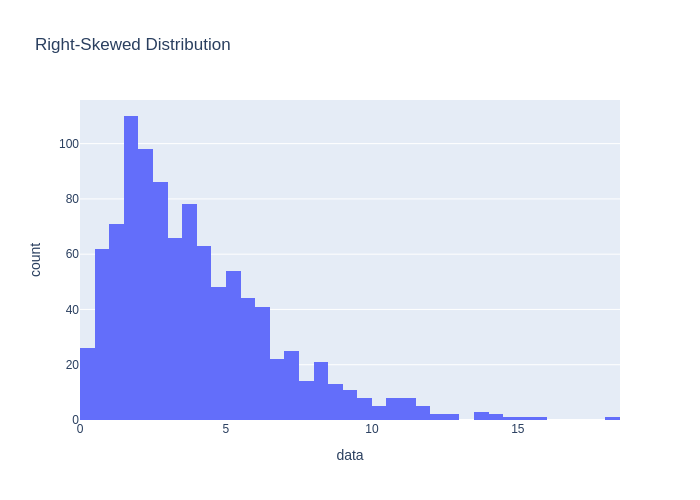

(3.95765526812045, array([3.33141477]))

In [42]:
import plotly.express as px
from scipy import stats
import pandas as pd
import numpy as np

# Right-skewed sample
sample1 = stats.gamma(a=2, scale=2).rvs(size=1000)
mean1 = sample1.mean()
median1 = np.quantile(sample1, [0.5])

# Plot histogram
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data", title="Right-Skewed Distribution")
fig1.show(renderer="png")

mean1, median1


**Cell 2: Left-Skewed Distribution Analysis** 

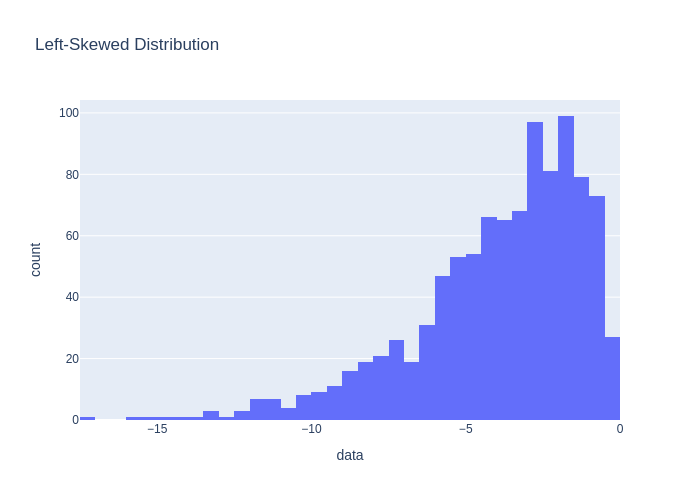

(-3.9620878982953815, array([-3.25881306]))

In [43]:
# Left-skewed sample
sample2 = -stats.gamma(a=2, scale=2).rvs(size=1000)
mean2 = sample2.mean()
median2 = np.quantile(sample2, [0.5])

# Plot histogram
fig2 = px.histogram(pd.DataFrame({'data': sample2}), x="data", title="Left-Skewed Distribution")
fig2.show(renderer="png")

mean2, median2


**Cell 3: Summary of Findings**

In [44]:
# Summary
results = {
    'Right Skewed': {
        'Mean': mean1,
        'Median': median1,
        'Skewness': 'Right'
    },
    'Left Skewed': {
        'Mean': mean2,
        'Median': median2,
        'Skewness': 'Left'
    }
}

results


{'Right Skewed': {'Mean': 3.95765526812045,
  'Median': array([3.33141477]),
  'Skewness': 'Right'},
 'Left Skewed': {'Mean': -3.9620878982953815,
  'Median': array([-3.25881306]),
  'Skewness': 'Left'}}

**The relationship between the mean and median in relation to skewness can be understood through the characteristics of data distributions:**

- Right-Skewed Distribution
    - Definition: In a right-skewed distribution, the tail on the right side (the higher values) is longer or fatter than the left side.
    - Mean vs. Median: In this case, the mean is usually greater than the median. This happens because the mean is affected by the larger values in the tail; these outliers pull the mean upwards. The median, being the middle value, remains more stable and is not influenced as much by extreme values.

- Left-Skewed Distribution
    - Definition: In a left-skewed distribution, the tail on the left side (the lower values) is longer or fatter than the right side.
    - Mean vs. Median: Here, the mean is typically less than the median. The lower values in the tail drag the mean down, while the median stays higher, reflecting the center of the data more accurately.

- Why This Happens
    - Sensitivity to Outliers: The mean is sensitive to all values in the dataset, including outliers, which can significantly distort its position. The median, however, only considers the middle value(s) and is less affected by extreme values.
    - Distribution Shape: The shape of the distribution determines how the values are spread. In skewed distributions, the imbalance caused by extreme values leads to this divergence between the mean and median.

**[Link to the ChatBot Session](https://chatgpt.com/share/66f1bc89-02cc-800e-a377-4e06bb38967e)**

**Summary to the ChatBot Session**

Summary of Exchanges
Exploration of Mean, Median, and Skewness:

We discussed the relationship between the mean and median in the context of right and left skewness.
Right-Skewed Distribution:
Characterized by a longer tail on the right.
The mean is greater than the median due to the influence of higher values.
Left-Skewed Distribution:
Characterized by a longer tail on the left.
The mean is less than the median due to the influence of lower values.
Reasons for the Relationship:

The mean is sensitive to outliers, while the median is more robust and only considers the middle value(s).
The shape of the distribution determines how values are spread, affecting the mean and median differently.
Code Explanation:

We reviewed a Python code snippet that generates right and left skewed data using a gamma distribution.
The code calculates and compares the mean and median of both distributions and plots histograms to visualize the skewness.
Extended Notebook Cells:

Suggested a sequence of notebook cells to analyze and visualize the distributions, including the calculation of mean and median for both right and left skewed data.
Conclusion:

Summarized that in right-skewed data, the mean is higher than the median, while in left-skewed data, the mean is lower than the median, illustrating the distinct perspectives provided by these measures of central tendency.

## Question 6

In [8]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")
df # df.columns

,restaurant id,category id,item id,serving size (oz),calories,calories from fat,total fat (g),total fat (% daily value),saturated fat (g),saturated fat (% daily value),...,carbohydrates (g),carbohydrates (% daily value),dietary fiber (g),dietary fiber (% daily value),sugars (g),protein (g),vitamin a (% daily value),vitamin c (% daily value),calcium (% daily value),iron (% daily value)
0,1000,100,0,4.8,300,120.0,13.0,20.0,5.0,25.0,...,31,10.0,4,17.0,3.0,17.0,10.0,0.0,25.0,15.0
1,1000,100,1,4.8,250,70.0,8.0,12.0,3.0,15.0,...,30,10.0,4,17.0,3.0,18.0,6.0,0.0,25.0,8.0
2,1000,100,2,3.9,370,200.0,23.0,35.0,8.0,42.0,...,29,10.0,4,17.0,2.0,14.0,8.0,0.0,25.0,10.0
3,1000,100,3,5.7,450,250.0,28.0,43.0,10.0,52.0,...,30,10.0,4,17.0,2.0,21.0,15.0,0.0,30.0,15.0
4,1000,100,4,5.7,400,210.0,23.0,35.0,8.0,42.0,...,30,10.0,4,17.0,2.0,21.0,6.0,0.0,25.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,3000,130,745,NaN,180,NaN,14.0,NaN,NaN,NaN,...,12,NaN,3,NaN,NaN,4.0,NaN,NaN,NaN,NaN
746,3000,130,746,NaN,190,NaN,18.0,NaN,NaN,NaN,...,6,NaN,3,NaN,NaN,7.0,NaN,NaN,NaN,NaN
747,3000,100,747,NaN,340,NaN,13.0,NaN,NaN,NaN,...,38,NaN,0,NaN,NaN,18.0,NaN,NaN,NaN,NaN
748,3000,100,748,NaN,90,NaN,8.0,NaN,NaN,NaN,...,5,NaN,4,NaN,NaN,1.0,NaN,NaN,NaN,NaN


Objective:
The purpose of this analysis is to understand the nutritional content of fast-food items.

**1. Features of the Data:**
We'll begin by checking the features (columns) to understand the type of data we are dealing with:

Numerical Features: These include continuous variables like calories, fats, proteins, carbohydrates, etc.
Categorical Features: Likely categories such as food types or names.

In [12]:
# Checking for features in the data
df.columns
df.dtypes


restaurant id                      int64
category id                        int64
item id                            int64
serving size (oz)                float64
calories                           int64
calories from fat                float64
total fat (g)                     object
total fat (% daily value)        float64
saturated fat (g)                float64
saturated fat (% daily value)    float64
trans fat (g)                    float64
cholesterol (mg)                 float64
cholesterol (% daily value)      float64
sodium (mg)                      float64
sodium (% daily value)           float64
carbohydrates (g)                  int64
carbohydrates (% daily value)    float64
dietary fiber (g)                  int64
dietary fiber (% daily value)    float64
sugars (g)                       float64
protein (g)                      float64
vitamin a (% daily value)        float64
vitamin c (% daily value)        float64
calcium (% daily value)          float64
iron (% daily va

**2. Data Cleaning:**
We’ll clean the data by:

Handling missing values (if any).
Ensuring that numerical columns have the correct data types.
Checking for duplicates and inconsistencies.

In [14]:
# Checking for missing values and duplicates
df.isnull().sum()
df.duplicated().sum()

0

In [15]:
# Dropping any duplicates (if necessary)
df = df.drop_duplicates()

In [17]:
# Filling missing values for only numeric columns
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

**3. Descriptive Statistics:**

We’ll compute summary statistics such as mean, min, max, and standard deviation for the numerical columns to get a high-level understanding of the dataset.

In [18]:
# Summary statistics for numerical columns
df.describe()


,restaurant id,category id,item id,serving size (oz),calories,calories from fat,total fat (% daily value),saturated fat (g),saturated fat (% daily value),trans fat (g),...,carbohydrates (g),carbohydrates (% daily value),dietary fiber (g),dietary fiber (% daily value),sugars (g),protein (g),vitamin a (% daily value),vitamin c (% daily value),calcium (% daily value),iron (% daily value)
count,750.000000,750.000000,750.00000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,...,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,2126.666667,113.685333,374.50000,10.612996,296.149333,127.096154,21.815385,3.409105,29.965385,0.603297,...,69.574667,15.780769,1.717333,6.530769,25.718995,11.398400,13.430141,7.954474,17.725275,8.819466
std,897.234043,9.956229,216.65064,5.284524,209.034366,75.196517,12.869435,4.582081,15.664996,1.099498,...,65.719590,5.539096,2.075374,3.708820,22.604414,11.119111,18.660702,19.554644,14.503668,9.426707
min,1000.000000,100.000000,0.00000,0.035274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,106.000000,187.25000,9.600000,150.000000,127.096154,21.815385,0.000000,29.965385,0.000000,...,30.000000,15.780769,0.000000,6.530769,6.000000,3.000000,4.000000,0.000000,8.000000,0.000000
50%,2000.000000,111.000000,374.50000,10.612996,260.000000,127.096154,21.815385,2.000000,29.965385,0.100000,...,48.000000,15.780769,1.000000,6.530769,25.718995,9.000000,10.000000,0.000000,17.725275,8.000000
75%,3000.000000,123.000000,561.75000,10.952661,410.000000,127.096154,21.815385,4.500000,29.965385,0.603297,...,85.750000,15.780769,3.000000,6.530769,37.750000,16.000000,15.000000,7.954474,25.000000,15.000000
max,3000.000000,130.000000,749.00000,32.000000,1880.000000,1060.000000,182.000000,30.000000,102.000000,9.000000,...,340.000000,47.000000,21.000000,28.000000,128.000000,118.000000,170.000000,240.000000,70.000000,50.000000


**4. Visualizations:**

Visualizations will help us identify patterns or anomalies in the data. We’ll use:

- Histograms to observe the distribution of calories, proteins, fats, etc.
- Boxplots to detect outliers in nutrition values.
- Bar plots to compare nutritional content across categories (if available).

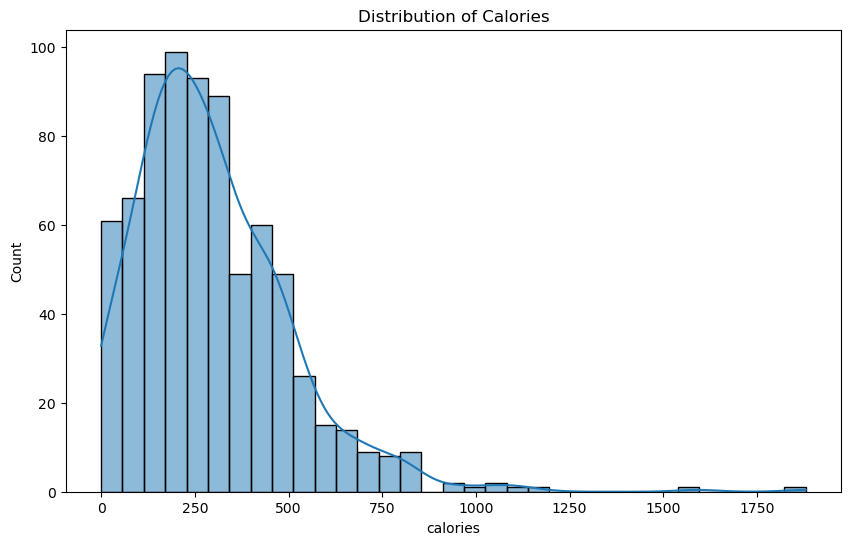

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of calories
plt.figure(figsize=(10,6))
sns.histplot(df['calories'], kde=True)
plt.title('Distribution of Calories')
plt.show()

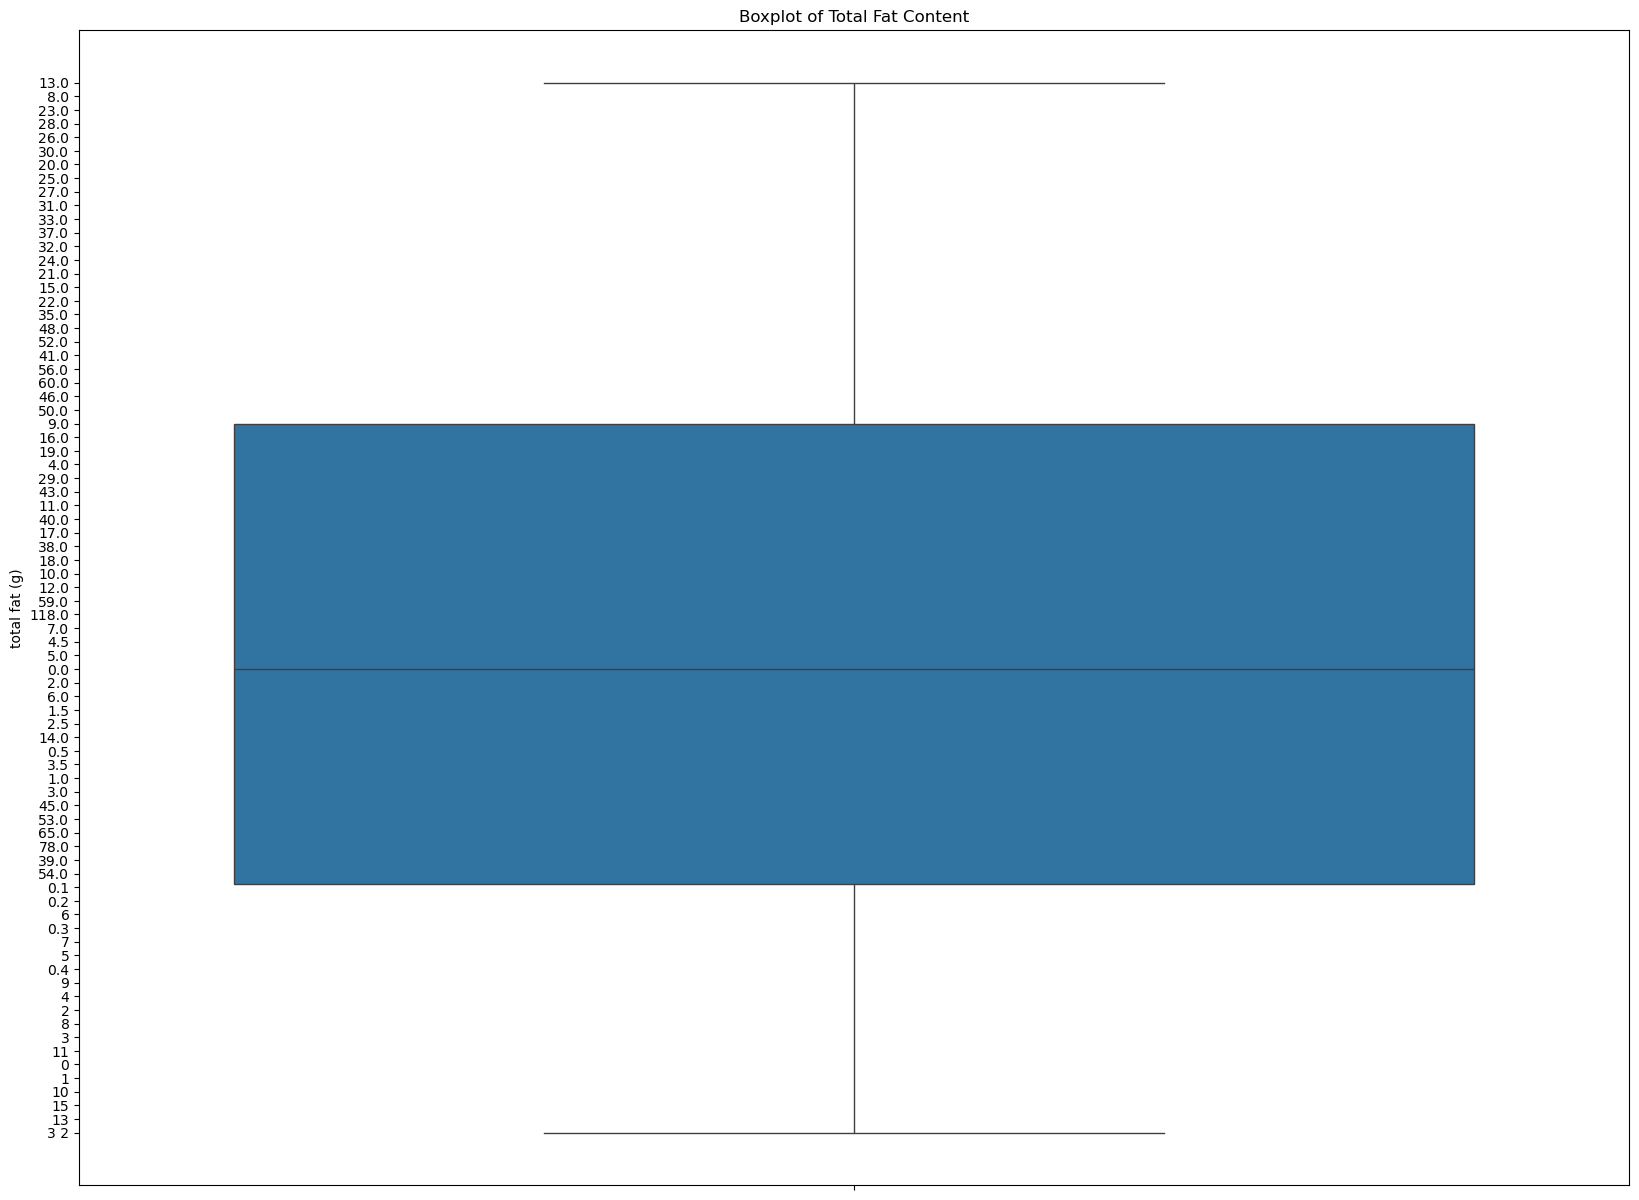

In [24]:
# Boxplot for fat content
plt.figure(figsize=(20,15))
sns.boxplot(df['total fat (g)'])
plt.title('Boxplot of Total Fat Content')
plt.show()

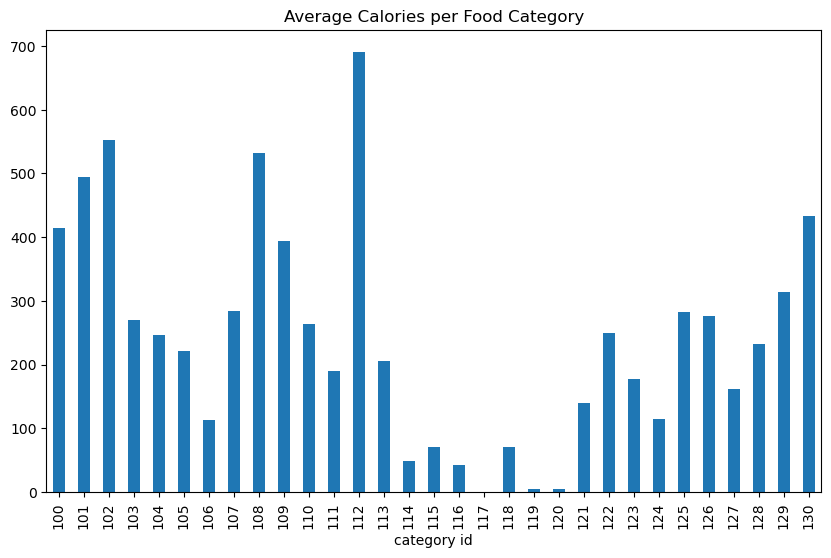

In [27]:
# Bar plot of average calories per food type (if applicable)
plt.figure(figsize=(10,6))
df.groupby('category id')['calories'].mean().plot(kind='bar')
plt.title('Average Calories per Food Category')
plt.show()

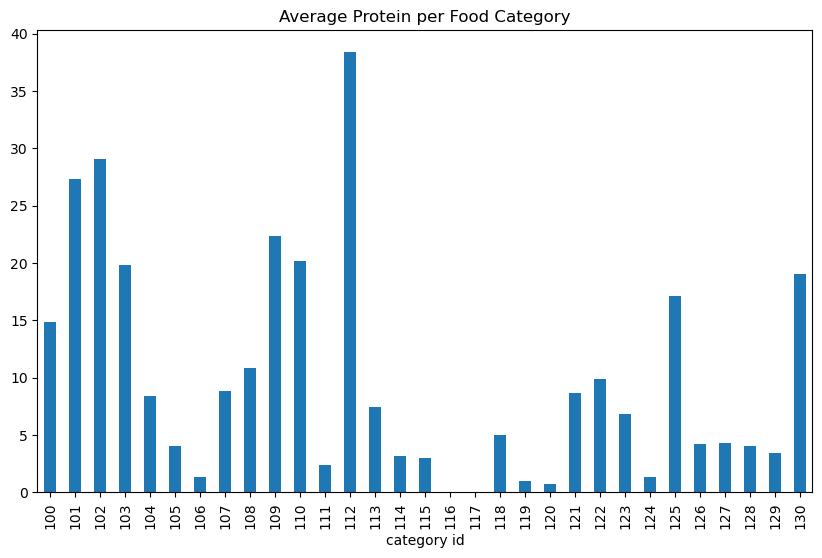

In [33]:
# Bar plot of average calories per food type (if applicable)
plt.figure(figsize=(10,6))
df.groupby('category id')['protein (g)'].mean().plot(kind='bar')
plt.title('Average Protein per Food Category')
plt.show()

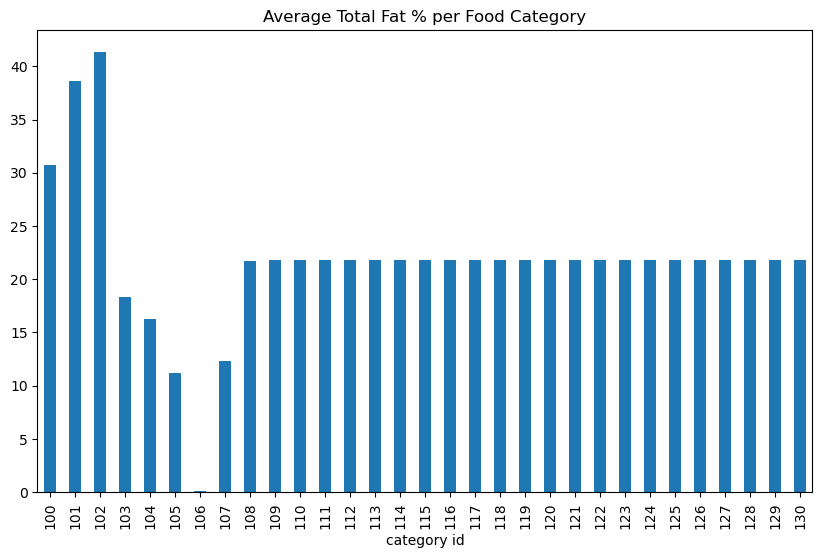

In [32]:
# Bar plot of average calories per food type (if applicable)
plt.figure(figsize=(10,6))
df.groupby('category id')['total fat (% daily value)'].mean().plot(kind='bar')
plt.title('Average Total Fat % per Food Category')
plt.show()

**5. Key Takeaways:**
Once we've analyzed the data, we’ll summarize the findings:

Which food items have the highest and lowest calories, fats, and proteins? 
- `category id` 112 has the highest calories and proteins, and 117 has the lowest calories and proteins.  
- `category id` 102 has the highest total fat %, and 106 has the lowest. 


**[Link to the ChatBot Session](https://chatgpt.com/share/66f4a382-4a80-800e-9bd2-7c882e5d46c4)**

**Summary to the ChatBot Session:**

- Objective Setting:
Purpose of Analysis: We aimed to explore the nutritional content of fast-food items to identify the most and least nutritious foods based on metrics like calories, fats, proteins, etc. The ultimate goal was to help people make healthier fast-food choices.
- Exploring Features:
Data Structure and Features: We identified numerical features (calories, fats, proteins, etc.) and categorical features (food types) by examining the columns and their data types.
- Data Cleaning:
Steps:
We checked for missing values and duplicates using df.isnull().sum() and df.duplicated().sum().
We removed duplicates and addressed missing values.
A TypeError was encountered when trying to fill missing values with the mean of the DataFrame because the operation included non-numeric columns.
The issue was resolved by restricting the mean() operation to numeric columns only
- Descriptive Statistics:
We generated descriptive statistics (mean, min, max, etc.) to get a high-level understanding of the dataset
- Visualizations:
We planned to use histograms to understand the distribution of calories and boxplots to identify outliers in fat content.
A bar plot would be used to compare the average calories across food categories, if available.
- Key Takeaways:
By calculating summary statistics and visualizing the data, we would identify food items with extreme nutritional values (highest and lowest calories, fats, etc.).
The results could guide healthier choices by highlighting fast foods with lower calorie or fat content and higher protein content.
- Error Encountered and Resolution:
A TypeError occurred during the filling of missing values due to non-numeric columns being included in the calculation. The issue was resolved by applying the mean() function only to numeric columns.


## Question 7

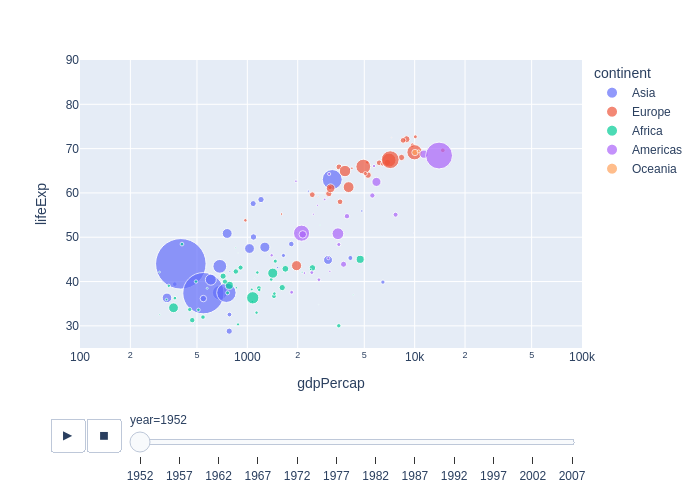

In [66]:
import plotly.express as px
df = px.data.gapminder()
fig = px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

fig.show(renderer="png")

## Question 8

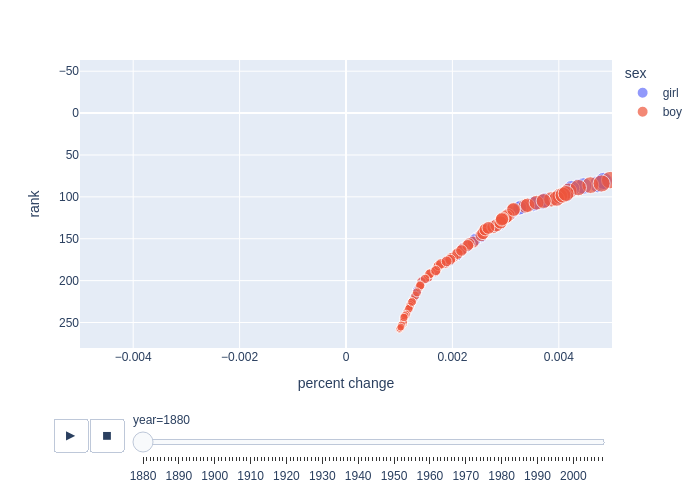

In [41]:
import pandas as pd
import plotly.express as px

# Load the baby names dataset
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')

# Make identical boy and girl names distinct
bn['name'] = bn['name'] + " " + bn['sex']

# Create rank based on percent within each year
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name', 'year'])

# Create the increase or decrease in name prevalence from the last year
bn['percent change'] = bn['percent'].diff()
new_name = [True] + list(bn.name[:-1].values != bn.name[1:].values)
bn.loc[new_name, 'percent change'] = bn.loc[new_name, 'percent']

# Sort by year and restrict to "common" names
bn = bn.sort_values('year')
bn = bn[bn.percent > 0.001]

# Create the scatter plot
fig = px.scatter(bn, 
                 x="percent change", 
                 y="rank", 
                 animation_frame="year", 
                 animation_group="name", 
                 size="percent", 
                 color="sex", 
                 hover_name="name", 
                 size_max=50, 
                 range_x=[-0.005, 0.005])

# Reverse the y-axis to put rank 1 on the top
fig.update_yaxes(autorange='reversed')

# Show the plot with the specified renderer
fig.show(renderer="png")


## Question 9

Yes